In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle
import seaborn as sns
import pandas as pd

from epuc.datasets import (
    PolynomialDataset,
    sine_fct_prediction,
    BernoulliSineDataset
)
from epuc.configs import data_config

#from experiments.run_experiments import create_data
from epuc.datasets import create_evaluation_data

plt.style.use("seaborn-v0_8-bright")
import json 
import os

### Plot results of second order optimisation experiments

In [4]:
# path to experiments with different number of samples
CLASS_DICT_100 = "../data/classification/new_exp_100_samples/"
CLASS_DICT_500 = "../data/classification/new_exp_500_samples/"
CLASS_DICT_1000 = "../data/classification/new_exp_1000_samples/"

REG_DICT_100 = "../data/regression/regression_100/"
REG_DICT_500 = "../data/regression/regression_500/"
REG_DICT_1000 = "../data/regression/regression_1000/"

# path to experiments wiith longer runtimes to track divergence of parameters
CLASS_DICT_LONG ="../data/classification/long_run/"
REG_DICT_LONG = "../data/regression/regression_longer/"

### 1. Classification

In [5]:
# fucntion to load the data for each experiment
def load_results(path):
    with open(path, 'rb') as f:
        results = pickle.load(f)
    return results

In [8]:
keys = ["Bernoulli", "Beta_outer", "Beta_outer_reg", "Beta_inner","Beta_inner_reg"]
# load results for different sample sizes

results_bernoulli_100 = load_results(os.path.join(CLASS_DICT_100, "results_Bernoulli.pkl"))
results_beta_outer_100 = load_results(os.path.join(CLASS_DICT_100, "results_Beta_outer.pkl"))
results_beta_inner_100 = load_results(os.path.join(CLASS_DICT_100, "results_Beta_inner.pkl"))
results_beta_outer_reg_100 = load_results(os.path.join(CLASS_DICT_100, "results_Beta_outer_reg.pkl"))
results_beta_inner_reg_100 = load_results(os.path.join(CLASS_DICT_100, "results_Beta_inner_reg.pkl"))
results_dict_100 = dict(zip(keys, [results_bernoulli_100, results_beta_outer_100, results_beta_outer_reg_100, results_beta_inner_100, results_beta_inner_reg_100]))

results_bernoulli_500 = load_results(os.path.join(CLASS_DICT_500, "results_Bernoulli.pkl"))
results_beta_outer_500 = load_results(os.path.join(CLASS_DICT_500, "results_Beta_outer.pkl"))
results_beta_inner_500 = load_results(os.path.join(CLASS_DICT_500, "results_Beta_inner.pkl"))
results_beta_outer_reg_500 = load_results(os.path.join(CLASS_DICT_500, "results_Beta_outer_reg.pkl"))
results_beta_inner_reg_500 = load_results(os.path.join(CLASS_DICT_500, "results_Beta_inner_reg.pkl"))
results_dict_500 = dict(zip(keys, [results_bernoulli_500, results_beta_outer_500, results_beta_outer_reg_500, results_beta_inner_500, results_beta_inner_reg_500]))

results_bernoulli_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Bernoulli.pkl"))
results_beta_outer_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Beta_outer.pkl"))
results_beta_inner_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Beta_inner.pkl"))
results_beta_outer_reg_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Beta_outer_reg.pkl"))
results_beta_inner_reg_1000 = load_results(os.path.join(CLASS_DICT_1000, "results_Beta_inner_reg.pkl"))
results_dict_1000 = dict(zip(keys, [results_bernoulli_1000, results_beta_outer_1000, results_beta_outer_reg_1000, results_beta_inner_1000, results_beta_inner_reg_1000]))

In [10]:
results_dicts = [results_dict_100, results_dict_500, results_dict_1000]
n_samples_list = [100, 500, 1000]
titles_rows = [r"$N=100$", r"$N=500$", r"$N=1000$"]
titles_cols = [
        "Reference Distribution \n",
        "Outer Expectation Minimization \n" + r"$\lambda=0.0$",
        "Outer Expectation Minimization \n" + r"$\lambda=0.01$",
        "Inner Expectation Minimization \n" + r"$\lambda=0.0$",
        "Inner Expectation Minimization \n" + r"$\lambda=0.01$",
    ]

In [11]:
#sns.set_style("whitegrid")
def plot_confidence_bounds_per_experiment(
    list_results: list,
    dataset,
    list_train_points: list,
    list_row_titles: list,
    list_col_titles: list,
    figsize: tuple,
    save_path: str,
    file_name: str,
    **kwargs_data,
):
    fig, ax = plt.subplots(len(list_results), len(list_results[0]), figsize=figsize, sharex=True, sharey=True)
    # plt.xticks(fontsize= 10)
    for ax_row in ax:
        for ax_sub in ax_row:
            ax_sub.tick_params(axis="both", which="major", labelsize=12)
    for axflat in ax.flat:
        axflat.tick_params(axis="both", which="major", labelsize=20)

    # plt.suptitle("Classification results", fontsize=25)
    # adjust spacing between subplots
    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    for i, title in enumerate(list_row_titles[::-1]):
        fig.text(
            0.1,
            (1.6 * i + 1.2) / 6,
            title,
            ha="center",
            va="center",
            rotation="vertical",
            fontsize=25,
        )
    # ax[0, 1].set_subtitle("test")
    for i, title in enumerate(list_col_titles):
        # bold titles
        ax[0, i].set_title(title, fontsize=20)
    for i in range(3):
       for j in range(len(list_results[0])):
           pass
             #ax[i, j].set_facecolor("white")
    # training data
    list_x_inst = []
    list_y_targets =[]
    for n_samples in list_train_points:
        dataset_train = dataset(n_samples, **kwargs_data)
        x_inst = dataset_train.x_inst
        y_target = dataset_train.y_labels
        list_x_inst.append(x_inst)
        list_y_targets.append(y_target)

    for i, ens_type in enumerate(list_results[0].keys()):
        for j, results_dict in enumerate(list_results):
            x_eval = np.linspace(0, 1, 1000)
            y_eval = sine_fct_prediction(x_eval)

            # create dataframe with instance values and targets
            # plot vertical lines for where training data is
            ax[j, i].axvline(list_x_inst[j].min(), linestyle="--", color="black", alpha=0.5)
            ax[j, i].axvline(list_x_inst[j].max(), linestyle="--", color="black", alpha=0.5)
            # plot ground truth
            ax[j, i].plot(x_eval, y_eval, label=r"$\theta$", color="red")
            ax[len(list_results) - 1, i].set_xlabel("x", fontsize=20)
            # ax[j, i].set_ylabel(r"$\theta$", fontsize=20)

            # scatter training data
            ax[j, i].scatter(
                list_x_inst[j],
                list_y_targets[j],
                label=r"$y_i$",
                marker="x",
                color="black",
                s=15,
                alpha=0.5,
            )
            ax[j,i].axvspan(x_inst.max(), x_eval.max(), alpha=0.1, color="gray")
            # plot predictions for theta ------------------------------------
            if ens_type == "Bernoulli":
                ax[j, i].plot(
                    x_eval,
                    results_dict[ens_type]["mean_probs"],
                    label=r"$\widehat{\theta}$",
                    color="blue",
                )
                ax[j, i].plot(
                    x_eval,
                    results_dict[ens_type]["pred_probs"][:, :, 0],
                    alpha=0.1,
                    color="black",
                )
                ax[j, i].fill_between(
                    x_eval,
                    results_dict[ens_type]["lower_p"],
                    results_dict[ens_type]["upper_p"],
                    alpha=0.5,
                    label="95% CI",
                    color="gray",
                )
            else:
                # plot predictions for mu ------------------------------------
             #   ax[j, i].plot(
             #       x_eval,
             #       results_dict[ens_type]["mean_pred_p"],
             #       label="mean prediction",
             ##       color="blue",
             #   )
                mean_pred_p = results_dict[ens_type]["pred_alphas"].mean(axis=1) / (
                    results_dict[ens_type]["pred_alphas"].mean(axis=1)
                    + results_dict[ens_type]["pred_betas"].mean(axis=1)
                )
                ax[j, i].plot(
                    x_eval, mean_pred_p, label = r"$\widehat{\theta}$", color="blue"
                )
                ax[j, i].fill_between(
                    x_eval,
                    results_dict[ens_type]["lower_p"],
                    results_dict[ens_type]["upper_p"],
                    alpha=0.5,
                    label="95% CI",
                    color="blue",
                )
            if j ==0 and (i == 0 or i == 1):
                ax[j, i].legend(fontsize=16)
    # ------------------------------------
    # add
    for i in range(3):  # 3 rows
        # Create a rectangle patch with the same size as the subplot
        rect = patches.Rectangle(
            (0, 0), 1, 1, transform=ax[i, 0].transAxes, color="gray", alpha=0.2
        )

        # Add the rectangle patch to the subplot
        ax[i, 0].add_patch(rect)

    plt.tick_params(axis="both", which="major", labelsize=22)

    # save plot in results folder
    # make sure folder exists
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    plt.savefig(
        save_path + file_name,
        bbox_inches="tight",
    )
    return fig, ax

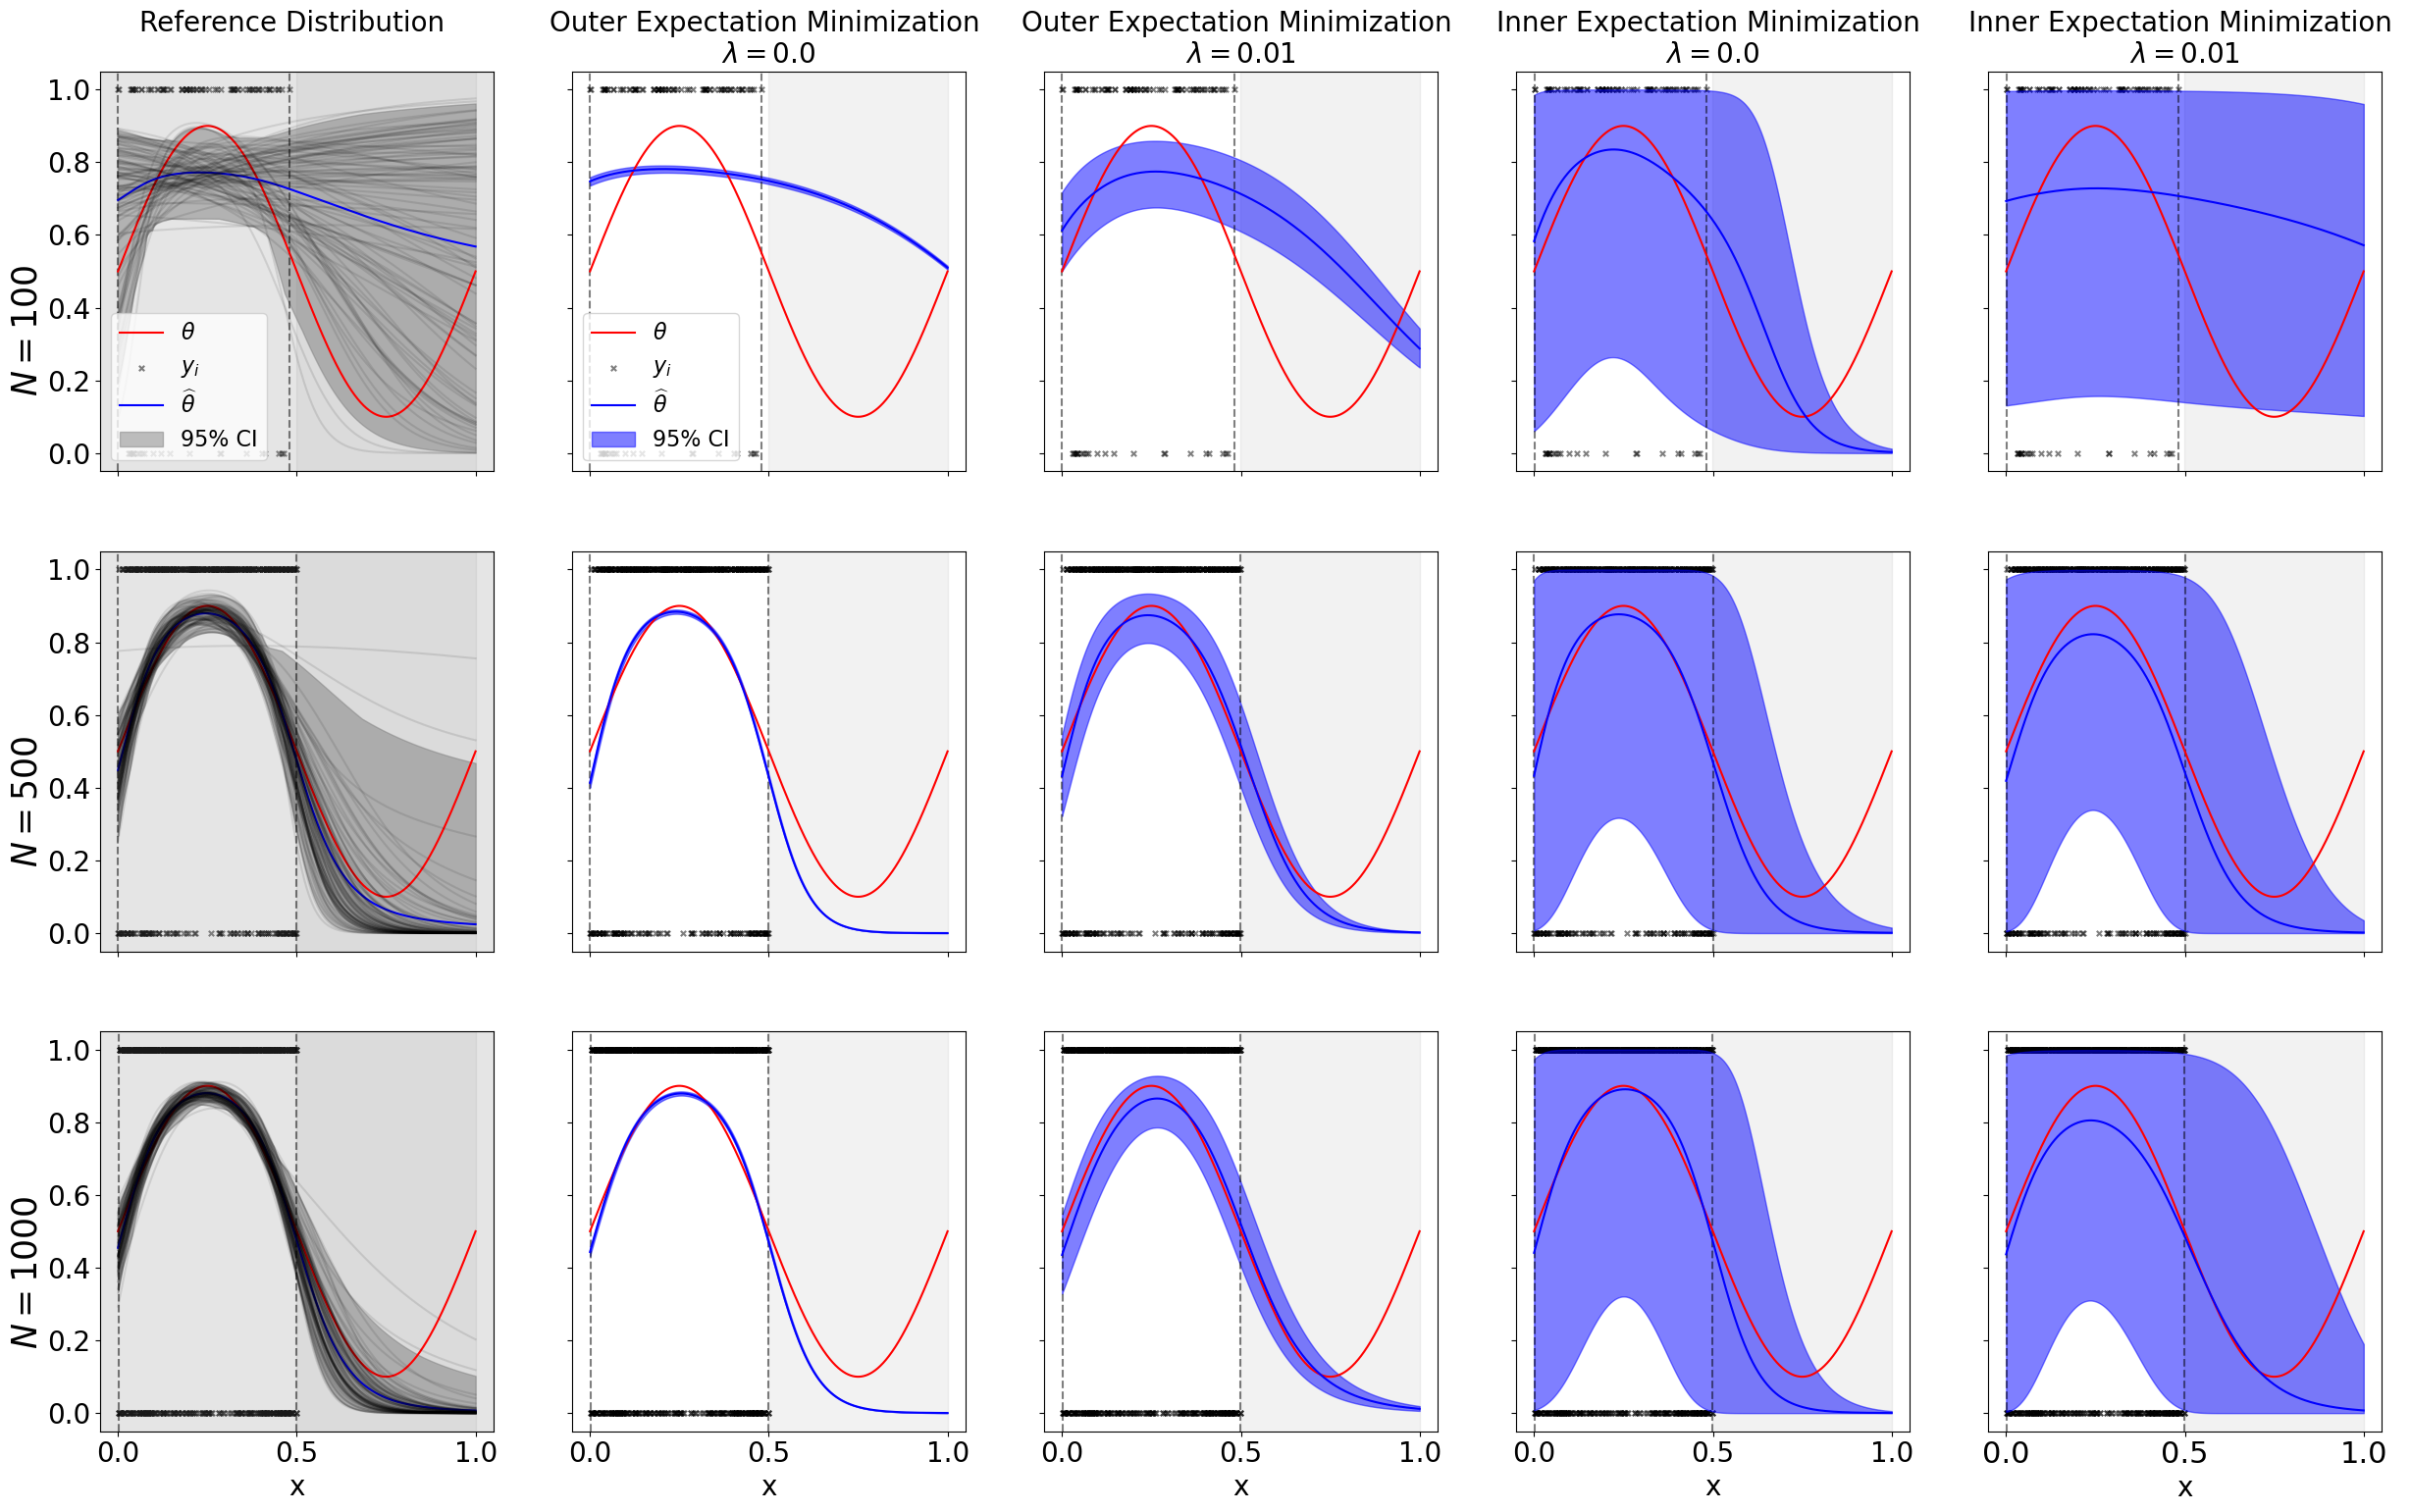

In [12]:
fig, ax = plot_confidence_bounds_per_experiment(results_dicts,BernoulliSineDataset, [100, 500, 1000], titles_rows, titles_cols, (30, 18), "./results/classification/", "conf_classification_new.pdf")

### parameter analysis:

In [62]:
results_longer_bernoulli = load_results(os.path.join(CLASS_DICT_LONG, "results_Bernoulli.pkl"))
results_longer_beta_outer = load_results(os.path.join(CLASS_DICT_LONG, "results_Beta_outer.pkl"))
results_longer_beta_outer_reg = load_results(os.path.join(CLASS_DICT_LONG, "results_Beta_outer_reg.pkl"))
results_longer_beta_inner = load_results(os.path.join(CLASS_DICT_LONG, "results_Beta_inner.pkl"))
results_longer_beta_inner_reg = load_results(os.path.join(CLASS_DICT_LONG, "results_Beta_inner_reg.pkl"))

results_longer = [results_longer_beta_outer, results_longer_beta_outer_reg, results_longer_beta_inner, results_longer_beta_inner_reg]

In [63]:
n_epochs = results_longer_bernoulli["conf_bounds"]["param_0"]["mean"].shape[0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


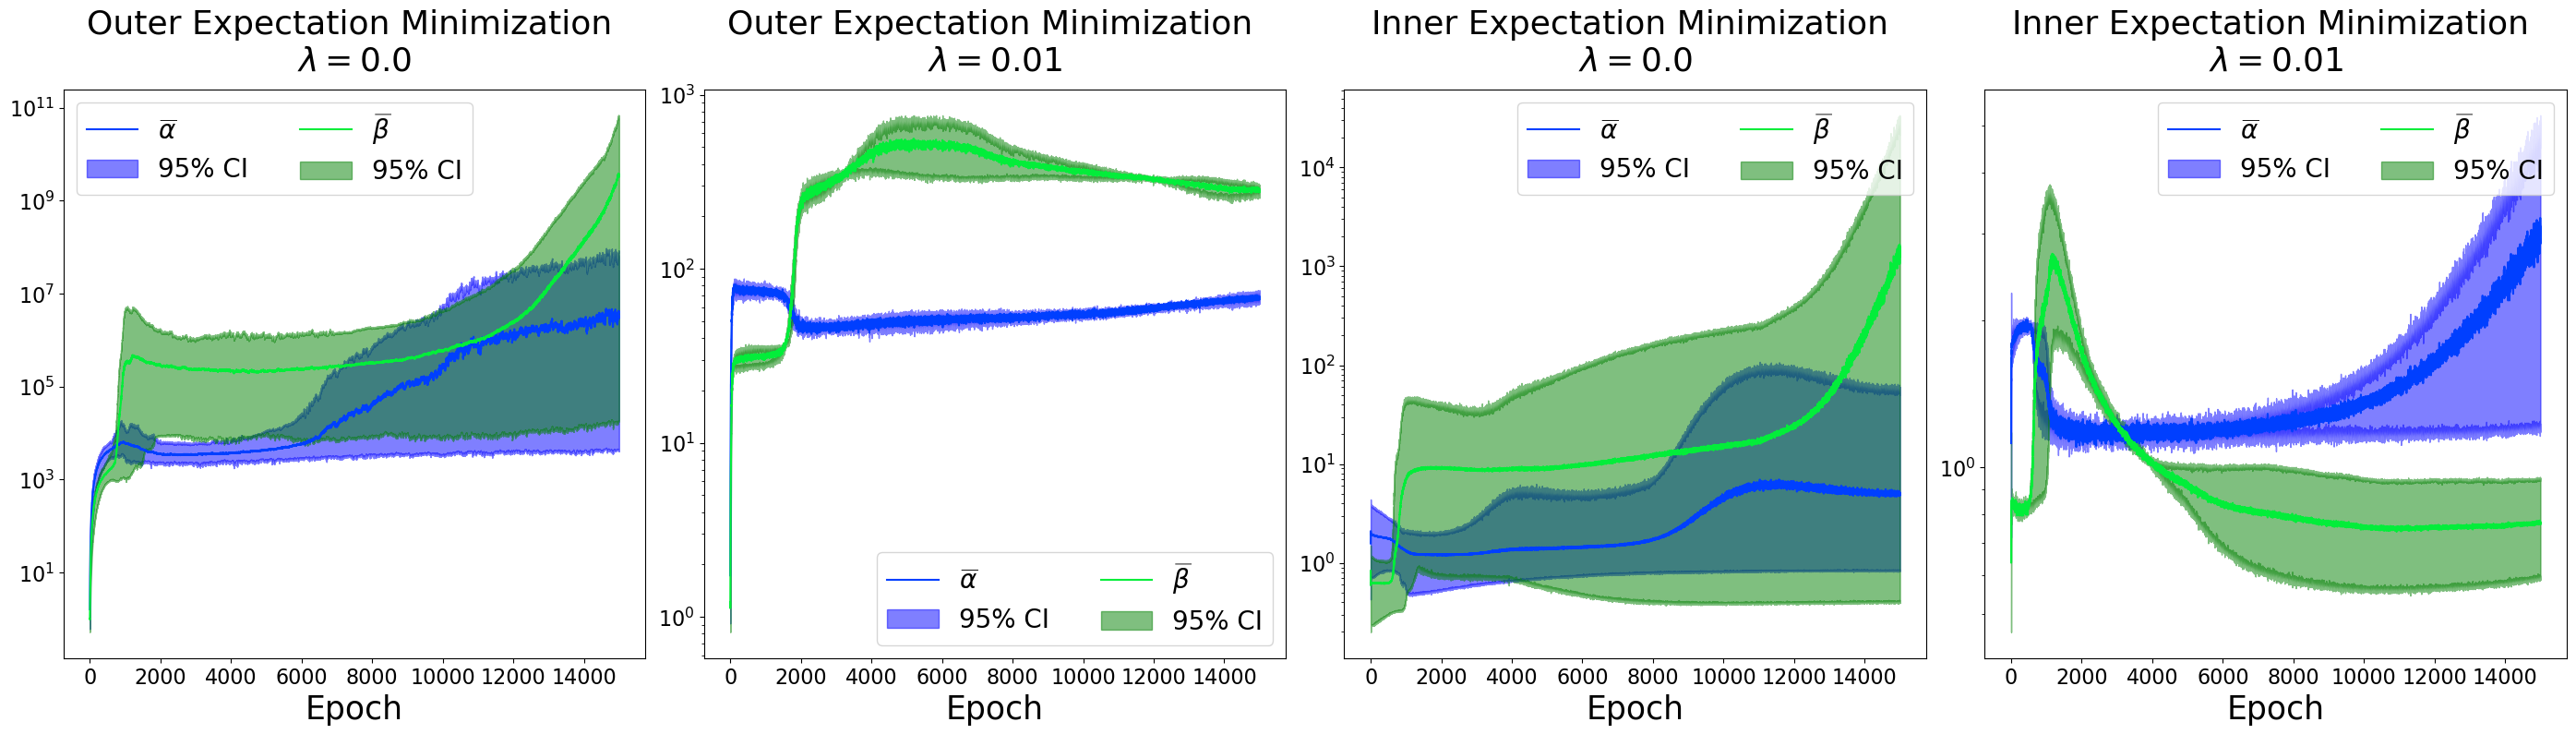

In [64]:
# change size of ticks
plt.rcParams["font.size"] = 28
# cahnge size of tick x and y labels

fig, ax = plt.subplots(1, len(results_longer), figsize=(35, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
col_titles = [
    "Outer Expectation Minimization \n" + "$\lambda=0.0$",
    "Outer Expectation Minimization \n" + "$\lambda=0.01$",
    "Inner Expectation Minimization \n" + "$\lambda=0.0$",
    "Inner Expectation Minimization \n" + "$\lambda=0.01$",
]
for ax_sub, col in zip(ax, col_titles):
    ax_sub.set_title(col, fontsize=26, pad=15)
    ax_sub.tick_params(axis="both", which="major", labelsize=16)

for i in range(len(results_longer)):
    ax[i].set_xlabel("Epoch", fontsize=25)
ax[0].legend(fontsize=14, loc="upper center", bbox_to_anchor=(0.5, 1.0))
# log scale y axis
# ax[0].set_yscale("log")
for i in range(len(results_longer)):
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_0"]["mean"], label=r"$\widebar{\alpha}$"
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_0"]["lower"],
        results_longer[i]["conf_bounds"]["param_0"]["upper"],
        alpha=0.5,
        label="95% CI",
        color="blue",
    )
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_1"]["mean"], label=r"$\widebar{\beta}$"
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_1"]["lower"],
        results_longer[i]["conf_bounds"]["param_1"]["upper"],
        alpha=0.5,
        label="95% CI",
        color="green",
    )

    # log scale y axis
    ax[i].set_yscale("log")
    # locate legend in upper middle
    ax[i].legend(fontsize=20, ncol=2)

    def format_y_axis(value, tick_number):
        return f"{value:.0f}"

    # Apply the formatter to the y-axis


# save figure
if not os.path.exists("./results/classification/figures"):
    os.makedirs("./results/classification/figures")
plt.savefig(
    "./results/classification/figures/classification_parameter_analysis.pdf",
    bbox_inches="tight",
)

### 3. Regression Case

In [40]:
keys_reg = ["Normal", "NIG_outer", "NIG_outer_reg", "NIG_inner", "NIG_inner_reg"]

In [41]:
# load data
results_normal_100 = load_results(os.path.join(REG_DICT_100, "results_Normal.pkl"))
results_normal_500 = load_results(os.path.join(REG_DICT_500, "results_Normal.pkl"))
results_normal_1000 = load_results(os.path.join(REG_DICT_1000, "results_Normal.pkl"))

results_nig_outer_100 = load_results(os.path.join(REG_DICT_100, "results_NIG_outer.pkl"))
results_nig_outer_500 = load_results(os.path.join(REG_DICT_500, "results_NIG_outer.pkl"))
results_nig_outer_1000 = load_results(os.path.join(REG_DICT_1000, "results_NIG_outer.pkl"))

results_nig_outer_reg_100 = load_results(os.path.join(REG_DICT_100, "results_NIG_outer_reg.pkl"))
results_nig_outer_reg_500 = load_results(os.path.join(REG_DICT_500, "results_NIG_outer_reg.pkl"))
results_nig_outer_reg_1000 = load_results(os.path.join(REG_DICT_1000, "results_NIG_outer_reg.pkl"))

results_nig_inner_100 = load_results(os.path.join(REG_DICT_100, "results_NIG_inner.pkl"))
results_nig_inner_500 = load_results(os.path.join(REG_DICT_500, "results_NIG_inner.pkl"))
results_nig_inner_1000 = load_results(os.path.join(REG_DICT_1000, "results_NIG_inner.pkl"))

results_nig_inner_reg_100 = load_results(os.path.join(REG_DICT_100, "results_NIG_inner_reg.pkl"))
results_nig_inner_reg_500 = load_results(os.path.join(REG_DICT_500, "results_NIG_inner_reg.pkl"))
results_nig_inner_reg_1000 = load_results(os.path.join(REG_DICT_1000, "results_NIG_inner_reg.pkl"))

In [42]:
results_dict_reg_100 = dict(
    zip(
        keys_reg,
        [
            results_normal_100,
            results_nig_outer_100,
            results_nig_outer_reg_100,
            results_nig_inner_100,
            results_nig_inner_reg_100,
        ],
    )
)
results_dict_reg_500 = dict(
    zip(
        keys_reg,
        [
            results_normal_500,
            results_nig_outer_500,
            results_nig_outer_reg_500,
            results_nig_inner_500,
            results_nig_inner_reg_500,
        ],
    )
)
results_dict_reg_1000 = dict(
    zip(
        keys_reg,
        [
            results_normal_1000,
            results_nig_outer_1000,
            results_nig_outer_reg_1000,
            results_nig_inner_1000,
            results_nig_inner_reg_1000,
        ],
    )
)

list_results_reg = [results_dict_reg_100, results_dict_reg_500, results_dict_reg_1000]

In [44]:
col_titles = ["Reference Model \n", "Outer Expectation Minimization \n" + r"$\lambda=0.0$", "Outer Expectation Minimization \n " + r"$\lambda=0.01$",
                "Inner Expectation Minimization \n" + r"$\lambda=0.0$","Inner Expectation Minimization \n" + r"$\lambda=0.01$" ]
row_titles = [r"$\boldsymbol{N=100}$", r"$\boldsymbol{N=500}$", r"$\boldsymbol{N=1000}$"]
n_samples = [100, 500, 1000]
ataset, x_eval, y_eval, x_inst, y_targets = create_evaluation_data(data_config, problem_type="regression", data_type="polynomial", n_eval_points=1000)

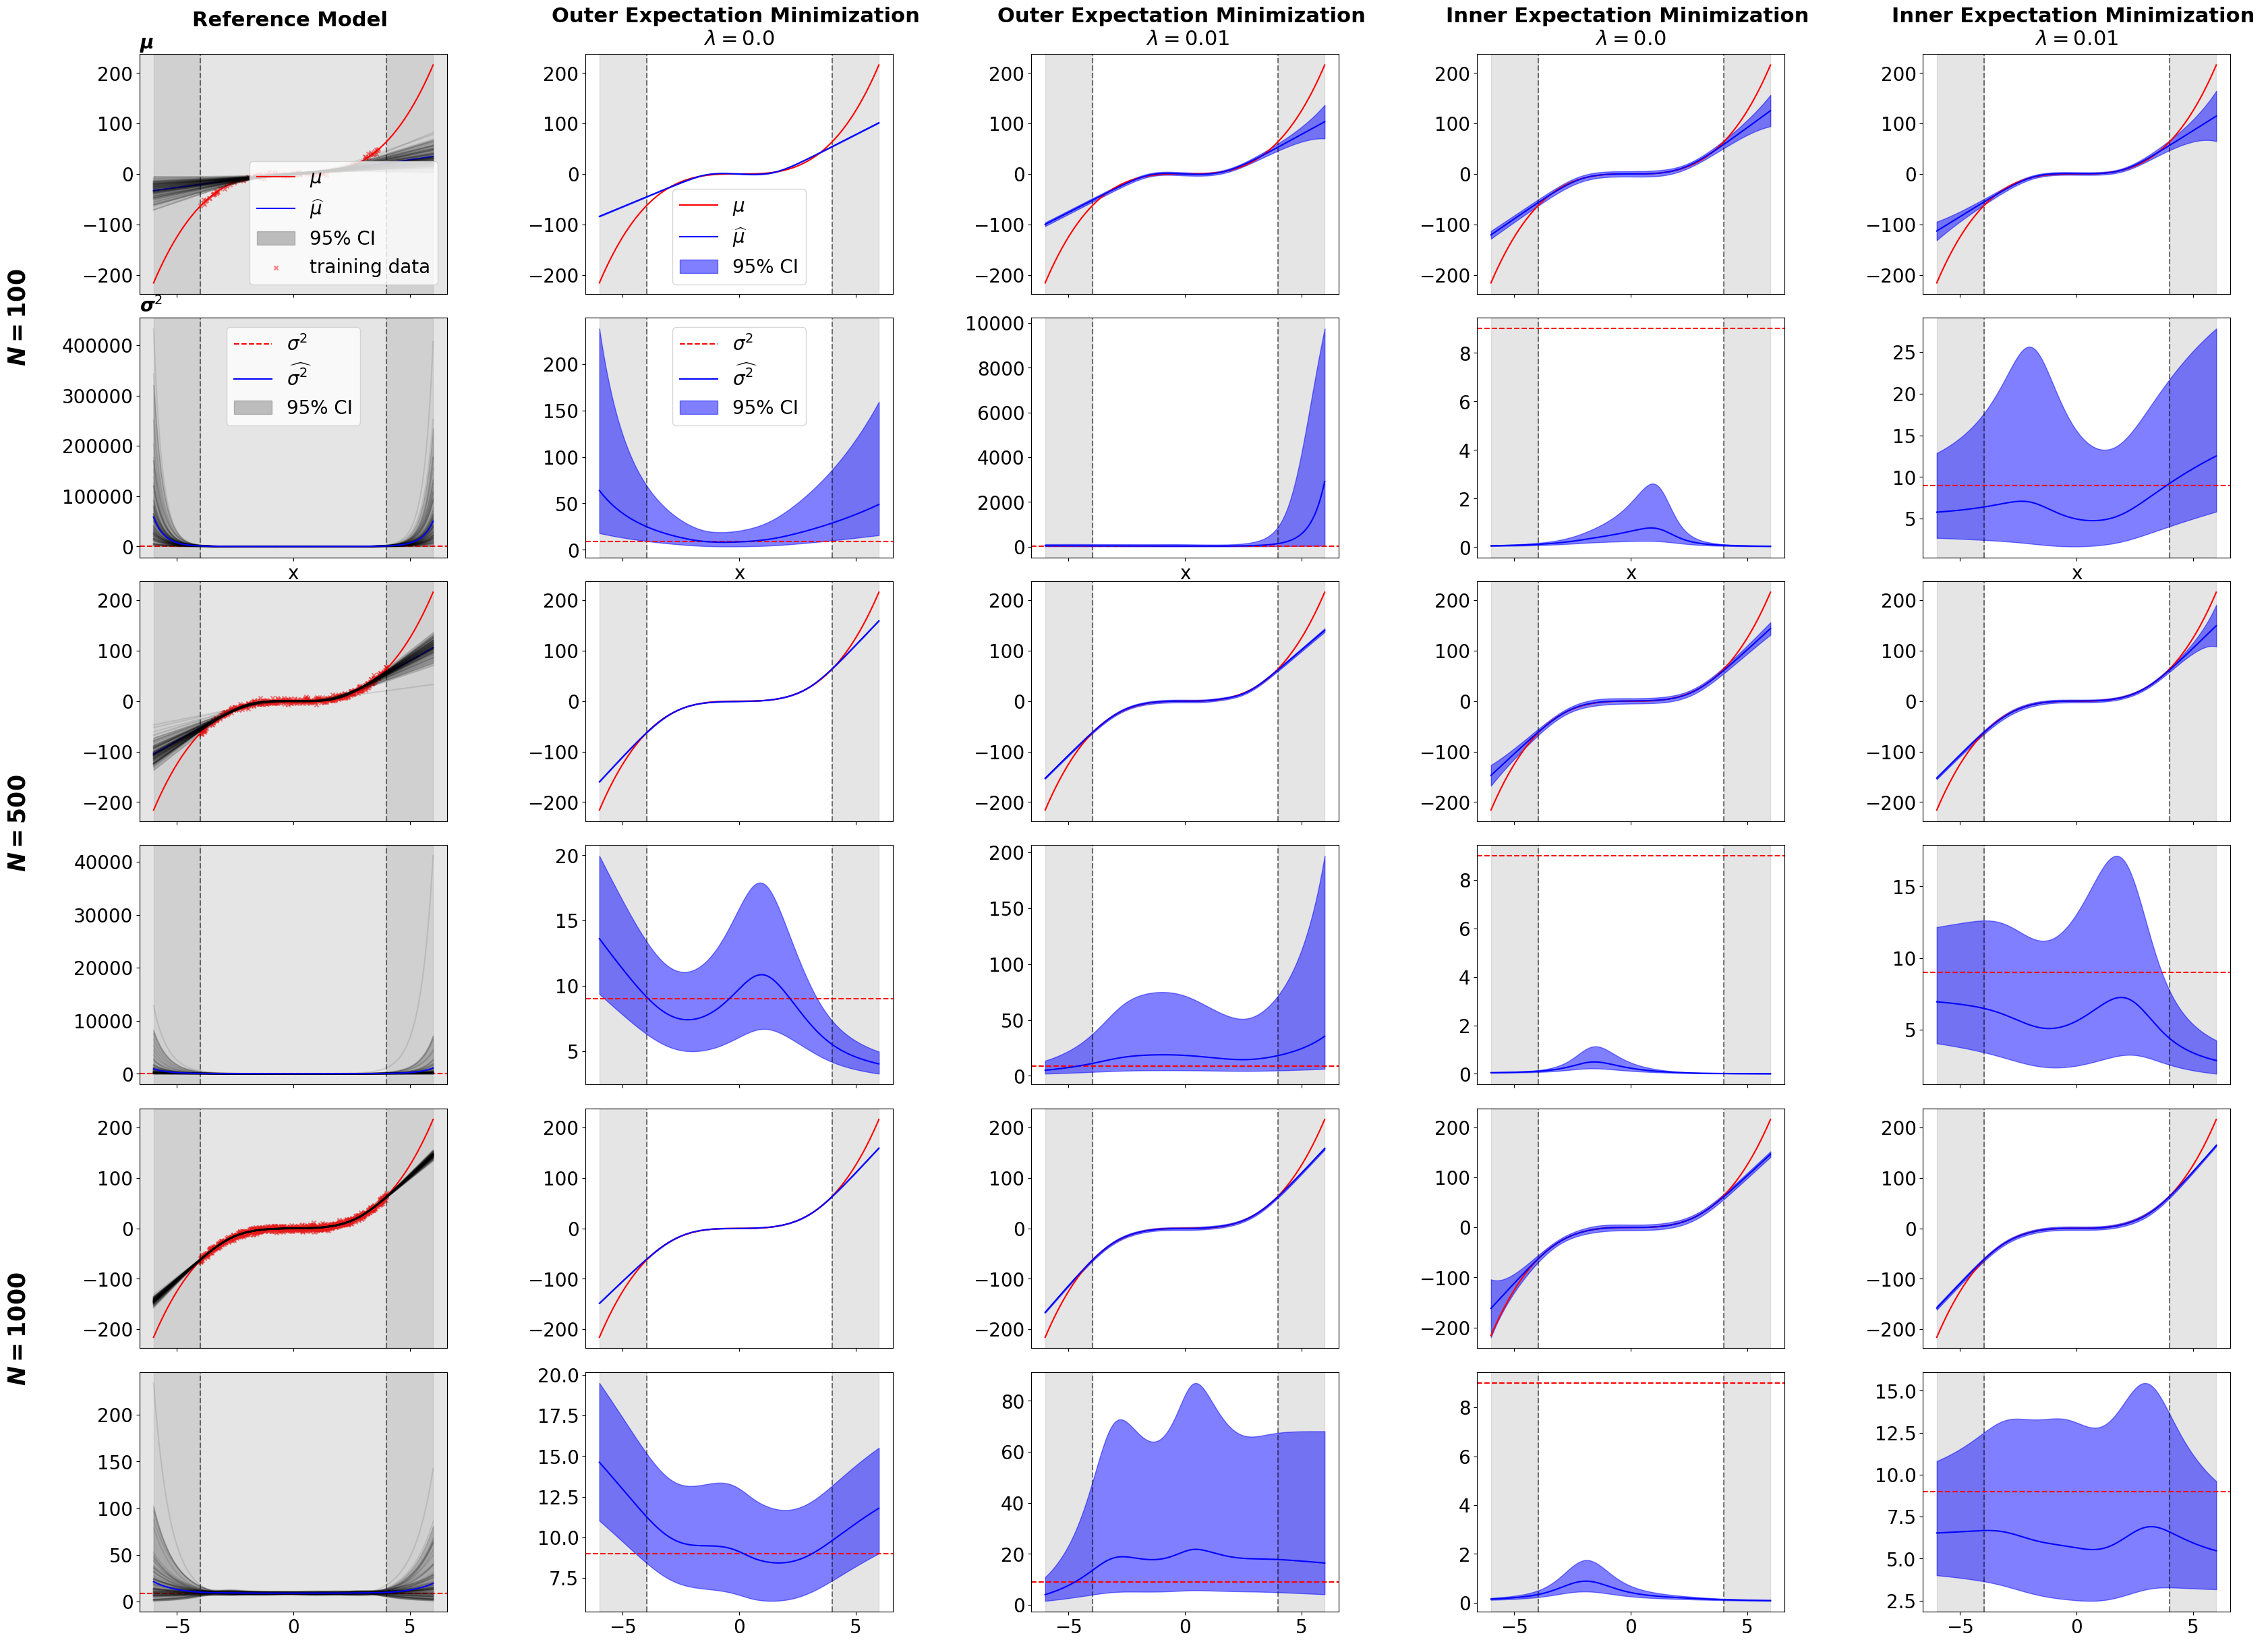

In [45]:
eps_std = 3
plt.rcParams["font.size"] = 20
n_pairs = len(list_results_reg)
fig, ax = plt.subplots(
    2 * len(list_results_reg),
    len(list_results_reg[0]),
    figsize=(40, 30), sharex=True
)
# ----
# make column titles
fig.subplots_adjust(hspace=0.1, wspace=0.45,)
for ax_sub, col in zip(ax[0], col_titles):
    ax_sub.set_title(col, fontsize=22, pad=10, weight="bold")
for i in range(2 * len(list_results_reg)):
    for j in range(len(list_results_reg[0])):
        ax[i, j].axvline(x_inst.min(), linestyle="--", color="black", alpha=0.5)
        ax[i, j].axvline(x_inst.max(), linestyle="--", color="black", alpha=0.5)
        ax[i, j].axvspan(x_eval.min(), x_inst.min(), alpha=0.2, color="gray")
        ax[i, j].axvspan(x_inst.max(), x_eval.max(), alpha=0.2, color="gray")
        ax[1, j].set_xlabel("x", fontsize=20)

for i, ens_type in enumerate(list_results_reg[0].keys()):
    for j in range(len(list_results_reg)):
        ax[2 * j + 1, i].axhline(
            eps_std**2, linestyle="--", color="red", label=r"$\sigma^2$"
        )
        # ax[2*j + 1, i].set_yscale("log")
        ax[2 * j, i].plot(x_eval, y_eval, label=r"$\mu$", color="red")
        dataset = PolynomialDataset(n_samples=n_samples[j])
        x_inst = dataset.x_inst
        y_targets = dataset.y_targets
        if ens_type == "Normal":
            # plot mu if i is odd
            ax[2 * j, 0].plot(
                x_eval,
                list_results_reg[j][ens_type]["mean_mus"],
                label=r"$\widehat{\mu}$",
                color="blue",
            )
            ax[2 * j, 0].plot(
                x_eval,
                list_results_reg[j][ens_type]["pred_mus"],
                alpha=0.1,
                color="black",
            )
            ax[2 * j, 0].fill_between(
                x_eval,
                list_results_reg[j][ens_type]["lower_mu"],
                list_results_reg[j][ens_type]["upper_mu"],
                alpha=0.5,
                label="95% CI",
                color="gray",
            )
            # scatter data points
            ax[2 * j, 0].scatter(
                x_inst,
                y_targets,
                label="training data",
                marker="x",
                s=20,
                color="red",
                alpha=0.5,
            )
            if j == 0:
                ax[2 * j, 0].legend(fontsize=20)
            # ------------------------------------
            # predictions for sigma2
            ax[2 * j + 1, 0].plot(
                x_eval,
                list_results_reg[j][ens_type]["pred_sigmas2"],
                alpha=0.1,
                color="black",
            )
            ax[2 * j + 1, 0].plot(
                x_eval,
                list_results_reg[j][ens_type]["mean_sigma2"],
                label=r"$\widehat{\sigma^2}$",
                color="blue",
            )
            ax[2 * j + 1, 0].fill_between(
                x_eval,
                list_results_reg[j][ens_type]["lower_sigma"],
                list_results_reg[j][ens_type]["upper_sigma"],
                alpha=0.5,
                label="95% CI",
                color="gray",
            )
            if j == 0:
                ax[2 * j + 1, 0].legend(fontsize=20)

        else:
            ax[2 * j, i].plot(
                x_eval,
                list_results_reg[j][ens_type]["mean_pred_mu"],
                label=r"$\widehat{\mu}$",
                color="blue",
            )
            ax[2 * j, i].fill_between(
                x_eval,
                list_results_reg[j][ens_type]["lower_mu"],
                list_results_reg[j][ens_type]["upper_mu"],
                alpha=0.5,
                label="95% CI",
                color="blue",
            )
            if j == 0 and i == 1:
                ax[2 * j, i].legend(fontsize=20)
            # ------------------------------------
            # plot predictions for sigma ------------------------------------
            ax[2 * j + 1, i].plot(
                x_eval,
                list_results_reg[j][ens_type]["mean_pred_sigma2"],
                label=r"$\widehat{\sigma^2}$",
                color="blue",
            )
            ax[2 * j + 1, i].fill_between(
                x_eval,
                list_results_reg[j][ens_type]["lower_sigma"],
                list_results_reg[j][ens_type]["upper_sigma"],
                alpha=0.5,
                label="95% CI",
                color="blue",
            )
            if j == 0 and i == 1:
                ax[2 * j + 1, i].legend(fontsize=20)

for i in range(6):
    # 3 rows
    # Create a rectangle patch with the same size as the subplot
    rect = patches.Rectangle(
        (0, 0), 1, 1, transform=ax[i, 0].transAxes, color="gray", alpha=0.2
    )

    # Add the rectangle patch to the subplot
    ax[i, 0].add_patch(rect)
for i, title in enumerate(row_titles[::-1]):
    fig.text(
        0.08,
        (1.5 * i + 1.5) / 6,
        title,
        fontsize=25,
        ha="center",
        va="center",
        rotation="vertical",
        weight="bold",
    )
row_titles_sub = [
    r"$\boldsymbol{\mu}$",
    r"$\boldsymbol{\sigma}^2$",
]  # Adjust titles as per your needs

for i, title in enumerate(row_titles_sub):
    ax[i, 0].set_title(title, loc="left", fontsize=20, weight="bold")
#plt.tight_layout()

### parameter analysis

In [47]:
results_longer_normal= load_results(os.path.join(REG_DICT_LONG, "results_Normal.pkl"))
results_longer_nig_outer = load_results(os.path.join(REG_DICT_LONG, "results_NIG_outer.pkl"))
results_longer_nig_outer_reg = load_results(os.path.join(REG_DICT_LONG, "results_NIG_outer_reg.pkl"))
results_longer_nig_inner = load_results(os.path.join(REG_DICT_LONG, "results_NIG_inner.pkl"))
results_longer_nig_inner_reg = load_results(os.path.join(REG_DICT_LONG, "results_NIG_inner_reg.pkl"))

results_longer = [results_longer_nig_outer, results_longer_nig_outer_reg, results_longer_nig_inner, results_longer_nig_inner_reg]

In [53]:
results_longer_nig_outer["conf_bounds"]["param_1"]["mean"]

tensor([6.7983e-01, 7.9309e-01, 9.0996e-01,  ..., 4.5367e+03, 4.5373e+03,
        4.5379e+03])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


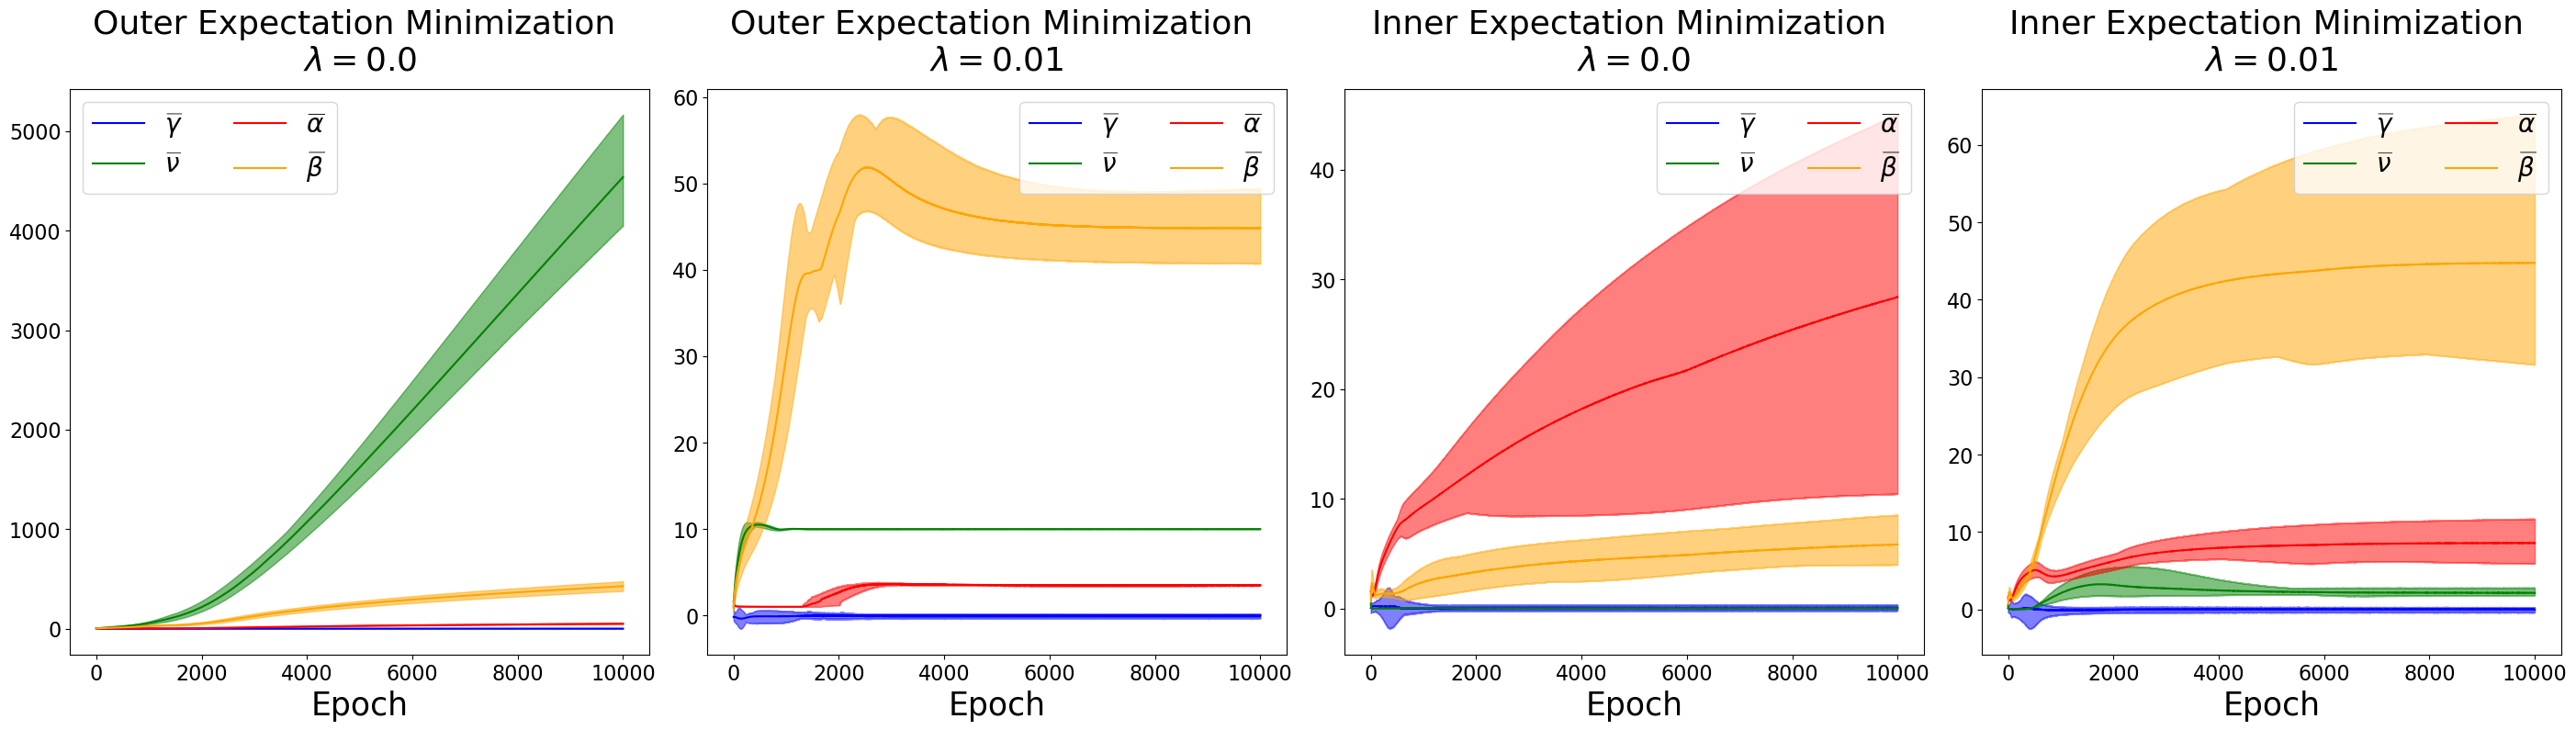

In [61]:
n_epochs = 10000
# change size of ticks
plt.rcParams["font.size"] = 28
# cahnge size of tick x and y labels

fig, ax = plt.subplots(1, len(results_longer), figsize=(35, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
col_titles = [
    "Outer Expectation Minimization \n" + "$\lambda=0.0$",
    "Outer Expectation Minimization \n" + "$\lambda=0.01$",
    "Inner Expectation Minimization \n" + "$\lambda=0.0$",
    "Inner Expectation Minimization \n" + "$\lambda=0.01$",
]
for ax_sub, col in zip(ax, col_titles):
    ax_sub.set_title(col, fontsize=26, pad=15)
    ax_sub.tick_params(axis="both", which="major", labelsize=16)

for i in range(len(results_longer)):
    ax[i].set_xlabel("Epoch", fontsize=25)
ax[0].legend(fontsize=14, loc="upper center", bbox_to_anchor=(0.5, 1.0))
# log scale y axis
# ax[0].set_yscale("log")
for i in range(len(results_longer)):
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_0"]["mean"], label=r"$\widebar{\gamma}$", color="blue"
    )
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_1"]["mean"], label=r"$\widebar{\nu}$", color="green"
    )
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_2"]["mean"], label=r"$\widebar{\alpha}$", color="red"
    )
    ax[i].plot(
        results_longer[i]["conf_bounds"]["param_3"]["mean"], label=r"$\widebar{\beta}$", color="orange"
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_0"]["lower"],
        results_longer[i]["conf_bounds"]["param_0"]["upper"],
        alpha=0.5,
        color="blue",
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_1"]["lower"],
        results_longer[i]["conf_bounds"]["param_1"]["upper"],
        alpha=0.5,
        color="green",
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_2"]["lower"],
        results_longer[i]["conf_bounds"]["param_2"]["upper"],
        alpha=0.5,
        color="red",
    )
    ax[i].fill_between(
        np.arange(0, n_epochs),
        results_longer[i]["conf_bounds"]["param_3"]["lower"],
        results_longer[i]["conf_bounds"]["param_3"]["upper"],
        alpha=0.5,
        color="orange",
    )

    # log scale y axis
    #ax[i].set_yscale("log")
    # locate legend in upper middle
    ax[i].legend(fontsize=20, ncol=2)

    def format_y_axis(value, tick_number):
        return f"{value:.0f}"

    # Apply the formatter to the y-axis


# save figure
if not os.path.exists("./results/regression/figures"):
    os.makedirs("./results/regression/figures")
plt.savefig(
    "./results/regression/figures/regression_parameter_analysis.pdf",
    bbox_inches="tight",
)